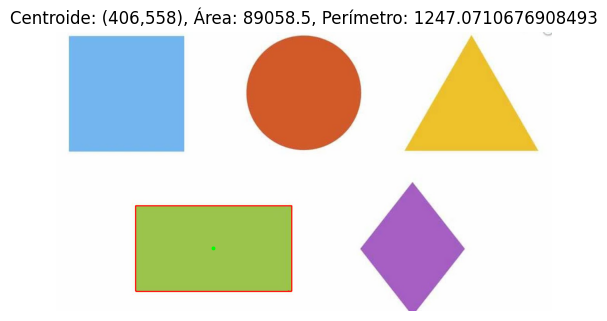

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Figurits.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, umbral = cv2.threshold(gris, 200, 255, cv2.THRESH_BINARY_INV)

contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contar = contornos[0]
momento = cv2.moments(contar)
cx = int(momento["m10"] / momento["m00"])
cy = int(momento["m01"] / momento["m00"])
area = cv2.contourArea(contar)
perimetro = cv2.arcLength(contar, True)

cv2.circle(img_rgb, (cx, cy), 5, (0, 255, 0), -1)
cv2.drawContours(img_rgb, [contar], -1, (255, 0, 0), 2)

plt.imshow(img_rgb)
plt.title(f'Centroide: ({cx},{cy}), Área: {area}, Perímetro: {perimetro}')
plt.axis('off')
plt.show()


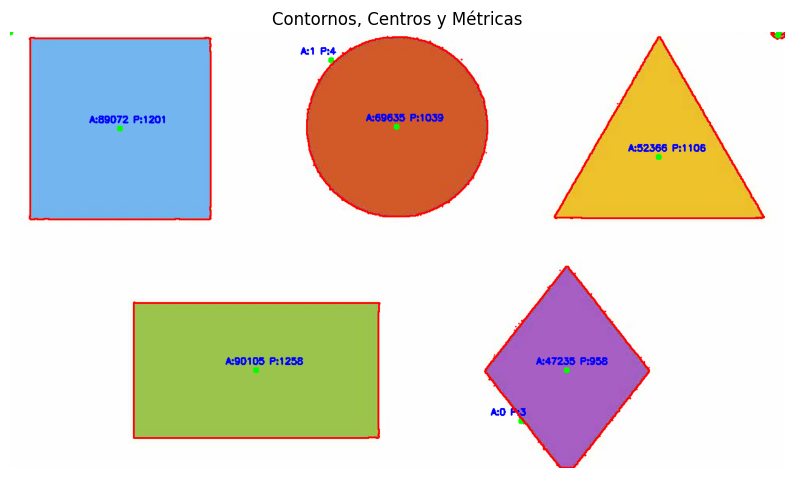

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Figurits.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0

    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    
    cv2.drawContours(image_rgb, [contour], -1, (255, 0, 0), 2)
    cv2.circle(image_rgb, (cx, cy), 5, (0, 255, 0), -1)
    cv2.putText(image_rgb, f'A:{int(area)} P:{int(perimeter)}', (cx - 50, cy - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title('Contornos, Centros y Métricas')
plt.axis('off')
plt.show()